<a href="https://colab.research.google.com/github/tugbargn/Cloud-Classification/blob/main/cloud_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np 
import pandas as pd
from keras.preprocessing import image
from PIL import Image
from scipy import misc
import seaborn as sns
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, Adamax, Adagrad
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/swimcat',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/swimcat',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

test_generator = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/swimcat',
  validation_split=0.2,
  subset="test",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

class_names = train_generator.class_names
print(class_names)




Found 784 files belonging to 5 classes.
Using 628 files for training.
Found 784 files belonging to 5 classes.
Using 156 files for validation.


ValueError: ignored

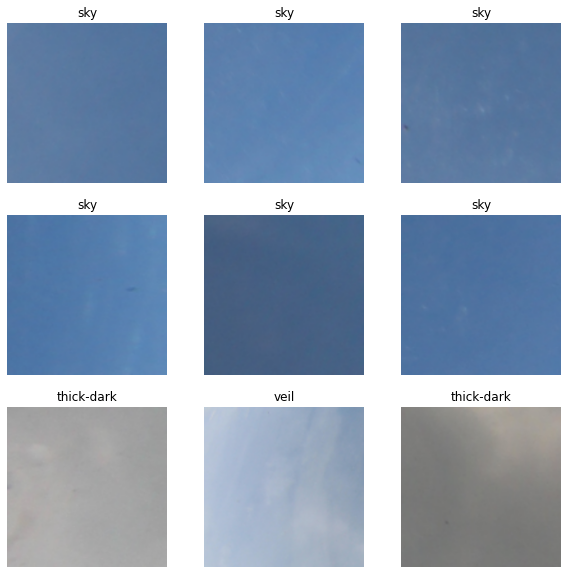

In [21]:
import matplotlib.pyplot as plt

#9 pictures in train set

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_generator = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_generator = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

(32, 224, 224, 3)
(32,)


In [23]:
num_classes = 5

densenet = DenseNet201(weights='imagenet', include_top=False)

input = Input(shape=(224, 224, 3))
x = Convolution2D(3, (3, 3), padding='same')(input)
    
x = densenet(x)
    
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# multi output
output = Dense(5,activation = 'softmax', name='root')(x)
 

# model
model = Model(input,output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



74842112/74836368 [==============================] - 1s 0us/step


In [24]:
epochs=10
history = model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=epochs
)
model.save_weights('cnn_data_augmentation.h5')

Epoch 1/10
20/20 [==============================] - 747s 36s/step - loss: 1.0054 - accuracy: 0.7083 - val_loss: 87.8130 - val_accuracy: 0.1410
Epoch 2/10
20/20 [==============================] - 715s 36s/step - loss: 0.2676 - accuracy: 0.9402 - val_loss: 133.7333 - val_accuracy: 0.1282
Epoch 3/10
20/20 [==============================] - 724s 36s/step - loss: 0.1304 - accuracy: 0.9611 - val_loss: 112.8910 - val_accuracy: 0.1282
Epoch 4/10
20/20 [==============================] - 727s 36s/step - loss: 0.1433 - accuracy: 0.9623 - val_loss: 7.5276 - val_accuracy: 0.4936
Epoch 5/10
20/20 [==============================] - 749s 37s/step - loss: 0.1420 - accuracy: 0.9539 - val_loss: 2.6600 - val_accuracy: 0.5833
Epoch 6/10
20/20 [==============================] - 737s 37s/step - loss: 0.1115 - accuracy: 0.9686 - val_loss: 5.2122 - val_accuracy: 0.4872
Epoch 7/10
20/20 [==============================] - 725s 36s/step - loss: 0.0872 - accuracy: 0.9820 - val_loss: 10.6057 - val_accuracy: 0.3077


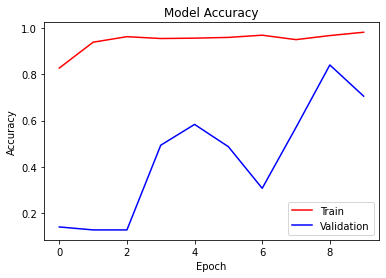

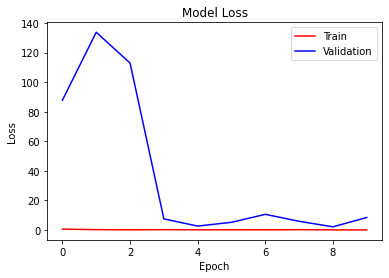

In [25]:
plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'],color = 'blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'best')
plt.show()

plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'],color = 'blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'best')
plt.show()
